# TP2 - Redes Neuronales (22.45)
En este trabajo páctico se busca mejorar la red otorgada por la cátedra con todos los conocimientos vistos en las clases.

Autor: Nicolás Bustelo - 61431

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas as pd
import numpy as np
import datetime
from pandas_summary import DataFrameSummary

In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
df = pd.read_feather('/kaggle/input/normalized/train_normalized_data.fth')
df_test = pd.read_feather('/kaggle/input/normalized/test_normalized_data.fth')

In [5]:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen', 'Promo2Weeks', 
            'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear', 'State', 
            'Week', 'Events', 'Promo_fw', 'Promo_bw', 'StateHoliday_bool_fw', 'StateHoliday_bool_bw', 'SchoolHoliday_fw', 'SchoolHoliday_bw']

#cat_vars = ['Store', 'DayOfWeek']

In [6]:
contin_vars = ['CompetitionDistance', 
   'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC', 'Precipitationmm',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday_bool', 'BeforeStateHoliday_bool', 'Promo', 'SchoolHoliday', 'StateHoliday_bool']
#contin_vars = ['BeforeStateHoliday_bool', 'Max_TemperatureC']

In [7]:
uniques = DataFrameSummary(df[cat_vars]).summary().loc[['uniques']]
uniques.T

,uniques
Store,1115
DayOfWeek,7
Year,3
Month,12
Day,31
StateHoliday,4
CompetitionMonthsOpen,25
Promo2Weeks,26
StoreType,4
Assortment,3


# Asignación de dimensión de embeddings

In [8]:
'''
cat_var_dict = {'Store': 50, 'DayOfWeek': 7, 'Year': 2, 'Month': 12,
'Day': 10, 'StateHoliday': 2, 'CompetitionMonthsOpen': 2,
'Promo2Weeks': 1, 'StoreType': 2, 'Assortment': 3, 'PromoInterval': 3,
'CompetitionOpenSinceYear': 4, 'Promo2SinceYear': 4, 'State': 6,
'Week': 25, 'Events': 4, 'Promo_fw': 1,
'Promo_bw': 1, 'StateHoliday_bool_fw': 1,
'StateHoliday_bool_bw': 1, 'SchoolHoliday_fw': 1,
'SchoolHoliday_bw': 1}
'''
cat_var_dict = {
    'Store': 1115, 
    'DayOfWeek': 7, 
    'Year': 3, 
    'Month': 12,
    'Day': 31, 
    'StateHoliday': 4, 
    'CompetitionMonthsOpen': 25,
    'Promo2Weeks': 26,
    'StoreType': 4,
    'Assortment': 3,
    'PromoInterval': 4,
    'CompetitionOpenSinceYear': 21,
    'Promo2SinceYear': 8, 
    'State': 12,
    'Week': 52,
    'Events': 22,
    'Promo_fw': 6,
    'Promo_bw': 6,
    'StateHoliday_bool_fw': 3,
    'StateHoliday_bool_bw': 3,
    'SchoolHoliday_fw': 8,
    'SchoolHoliday_bw': 8}

In [9]:
for v in cat_vars:
    uniques_ = df[v].unique()
    uniques_.sort()
    print(v, cat_var_dict[v], len(uniques_), uniques_)
    print()

Store 1115 1115 [   0    1    2 ... 1112 1113 1114]

DayOfWeek 7 7 [0 1 2 3 4 5 6]

Year 3 3 [0 1 2]

Month 12 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Day 31 31 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]

StateHoliday 4 4 [0 1 2 3]

CompetitionMonthsOpen 25 25 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]

Promo2Weeks 26 26 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]

StoreType 4 4 [0 1 2 3]

Assortment 3 3 [0 1 2]

PromoInterval 4 4 [0 1 2 3]

CompetitionOpenSinceYear 21 21 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]

Promo2SinceYear 8 8 [0 1 2 3 4 5 6 7]

State 12 12 [ 0  1  2  3  4  5  6  7  8  9 10 11]

Week 52 52 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]

Events 22 22 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 

# Definición de modelo

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, Input, Flatten, Concatenate, Dense, BatchNormalization, Activation, LeakyReLU, Dropout
from tensorflow.keras.regularizers import l2

In [11]:
def get_cat_vars_model(cat_vars, uniques, cat_var_dict):
    cat_vars_embed_outs = []
    cat_var_inputs = []
    for cat_var in cat_vars:
        cat_var_in = Input(shape=(1,), name=f"{cat_var}_input")
        cat_var_inputs.append(cat_var_in)
        embed_out = Embedding(uniques[cat_var][0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)
        flatten_out = Flatten(name=f"{cat_var}_flat")(embed_out)
        cat_vars_embed_outs.append(flatten_out)
    return cat_var_inputs, cat_vars_embed_outs

def get_cont_vars_input(contin_vars, dense_layer=False):
    cont_vars_inputs = []
    cont_vars_outputs = []
    for cont_var in contin_vars:
        cont_var_in = Input(shape=(1,), name=f"{cont_var}_input")
        cont_vars_inputs.append(cont_var_in)
        if dense_layer:
            cont_var_out = Dense(1, name=f"{cont_var}_input", activation = 'linear')(cont_var_in)
            cont_vars_outputs.append(cont_var_out)
        else:
            cont_vars_outputs.append(cont_var_in)
    return cont_vars_inputs, cont_vars_outputs

In [12]:
add_customers = True
log_output = True
output_activation = 'linear'
cat_var_inputs, cat_vars_embed_outs = get_cat_vars_model(cat_vars, uniques, cat_var_dict)
cont_vars_inputs,  cont_vars_outs= get_cont_vars_input(contin_vars)

/tmp/ipykernel_26/543933484.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  embed_out = Embedding(uniques[cat_var][0], cat_var_dict[cat_var], name=f'{cat_var}_Embed')(cat_var_in)


In [13]:
# Descomentar para ver resultados
# cat_vars_embed_outs
# cat_var_inputs
# cont_vars_inputs
# cont_vars_outs

## Modelo de red

In [14]:
# Importo las bibliotecas a utilizar
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard

In [15]:
l2_lambda = 1e-4
merged = Concatenate(name='All_Concatenate')(cat_vars_embed_outs + cont_vars_inputs)

x = Dense(1024, kernel_constraint=MaxNorm(5), kernel_initializer=initializers.RandomNormal(stddev=0.1), kernel_regularizer=l2(l2_lambda))(merged)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)

x = Dense(515, kernel_constraint=MaxNorm(5))(merged)
x = Activation('relu')(x)
x = Dropout(0.1)(x)

x = Dense(1024, kernel_constraint=MaxNorm(5), kernel_initializer=initializers.RandomNormal(stddev=0.1), kernel_regularizer=l2(l2_lambda))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.1)(x)

# x = LeakyReLU()(x)

output_1 = Dense(1, name='Sales', activation=output_activation)(x)
output_2 = Dense(1, name='Customers', activation=output_activation)(x)

In [16]:
if add_customers:
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1, output_2])
else: 
    model = Model(cat_var_inputs + cont_vars_inputs, [output_1])

In [17]:
# Descomentar para ver
#model.summary()

In [18]:
model.save_weights('initial_weights.hdf5')

In [19]:
df_train = df[df.Date < datetime.datetime(2015, 7, 1)]  
df_val = df[df.Date >= datetime.datetime(2015, 7, 1)]
print(f'Cantidad en val: {len(df_val)}, porcentaje: {len(df_train)/(len(df_train) + len(df_val))}')

Cantidad en val: 30188, porcentaje: 0.9642465458145908


In [20]:
stores_mean = {}
for store, g_df in df_train.groupby('Store'):
    stores_mean[store] = g_df[g_df['Sales'] > 0]['Sales'].mean()

In [21]:
df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)

df_train.loc[:, 'Sales_store'] = df_train['Sales'] - df_train['mean_by_store']
df_val.loc[:, 'Sales_store'] = df_val['Sales'] - df_val['mean_by_store']

/tmp/ipykernel_26/3553976367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:, 'mean_by_store'] = df_train['Store'].apply(stores_mean.get)
/tmp/ipykernel_26/3553976367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val.loc[:, 'mean_by_store'] = df_val['Store'].apply(stores_mean.get)
/tmp/ipykernel_26/3553976367.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [22]:
from tensorflow.keras import backend as K

In [23]:
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred)/y_true)))

In [24]:
def get_metric(df, sales_):
    return np.sqrt((((df['Sales'] - sales_)/df['Sales'])**2).mean())
get_metric(df_val, df_val['mean_by_store'])

0.3071746085338871

In [25]:
all_vars = cat_vars + contin_vars
X_train = np.hsplit(df_train[all_vars].values, len(all_vars))
X_val = np.hsplit(df_val[all_vars].values, len(all_vars))
X_test = np.hsplit(df_test[all_vars].values, len(all_vars))

In [26]:
if add_customers:
    y_out_columns = ['Sales', 'Customers']
else:
    y_out_columns = ['Sales_store']
    
if log_output:
    # Escala logaritmica
    max_log_y = np.max(np.log(df[y_out_columns].values))
    y_train = np.log(df_train[y_out_columns].values)/max_log_y
    y_val = np.log(df_val[y_out_columns].values)/max_log_y
else:
    # Normalización
    y_mean = df_train[y_out_columns].mean().values
    y_std = df_train[y_out_columns].std().values
    #y_train = (df_train[y_out_columns].values - y_mean)/y_std
    #y_val = (df_val[y_out_columns].values - y_mean)/y_std
    y_max = df_train[y_out_columns].max().values
    y_train = df_train[y_out_columns].values/y_max
    y_val = df_val[y_out_columns].values/y_max
y_train = np.hsplit(y_train, y_train.shape[1])
y_val = np.hsplit(y_val, y_val.shape[1])

In [27]:
lr = 0.0001
model.compile(optimizer=Adam(lr=lr), metrics=['mse', rmspe], loss='mse')

In [28]:
if add_customers:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_Sales_mse', verbose=1, save_best_only=True)
else:
    checkpoint = ModelCheckpoint('bestmodel.hdf5', monitor='val_loss', verbose=1, save_best_only=True)

In [29]:
rlrop = ReduceLROnPlateau(
    monitor = "val_Sales_mse",
    factor = 0.5,
    patience = 3,
    verbose = 1,
    min_lr = 1e-5
)

In [30]:
es = EarlyStopping(
    monitor = "val_Sales_mse",
    patience = 7, 
    verbose = 1,
    restore_best_weights = True,
)

In [31]:
epochs = 15
batch_size = 256
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),  
    epochs=epochs, 
    batch_size=batch_size, 
    callbacks=[rlrop, es, checkpoint], 
    verbose=2
)

Epoch 1/15

Epoch 1: val_Sales_mse improved from inf to 0.00671, saving model to bestmodel.hdf5
3181/3181 - 73s - loss: 0.2372 - Sales_loss: 0.0213 - Customers_loss: 0.0157 - Sales_mse: 0.0213 - Sales_rmspe: 0.1208 - Customers_mse: 0.0157 - Customers_rmspe: 0.1332 - val_loss: 0.0263 - val_Sales_loss: 0.0067 - val_Customers_loss: 0.0062 - val_Sales_mse: 0.0067 - val_Sales_rmspe: 0.0979 - val_Customers_mse: 0.0062 - val_Customers_rmspe: 0.1271 - lr: 0.0010 - 73s/epoch - 23ms/step
Epoch 2/15


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_Sales_mse improved from 0.00671 to 0.00047, saving model to bestmodel.hdf5
3181/3181 - 43s - loss: 0.0043 - Sales_loss: 0.0012 - Customers_loss: 6.7591e-04 - Sales_mse: 0.0012 - Sales_rmspe: 0.0409 - Customers_mse: 6.7591e-04 - Customers_rmspe: 0.0419 - val_loss: 0.0012 - val_Sales_loss: 4.7428e-04 - val_Customers_loss: 3.8300e-04 - val_Sales_mse: 4.7428e-04 - val_Sales_rmspe: 0.0261 - val_Customers_mse: 3.8300e-04 - val_Customers_rmspe: 0.0317 - lr: 0.0010 - 43s/epoch - 13ms/step
Epoch 3/15

Epoch 3: val_Sales_mse improved from 0.00047 to 0.00031, saving model to bestmodel.hdf5
3181/3181 - 43s - loss: 7.2204e-04 - Sales_loss: 3.4780e-04 - Customers_loss: 2.2515e-04 - Sales_mse: 3.4780e-04 - Sales_rmspe: 0.0222 - Customers_mse: 2.2515e-04 - Customers_rmspe: 0.0241 - val_loss: 5.2406e-04 - val_Sales_loss: 3.1064e-04 - val_Customers_loss: 1.5108e-04 - val_Sales_mse: 3.1064e-04 - val_Sales_rmspe: 0.0210 - val_Customers_mse: 1.5108e-04 - val_Customers_rmspe: 0.0198 - lr: 0.00

In [32]:
import matplotlib.pyplot as plt

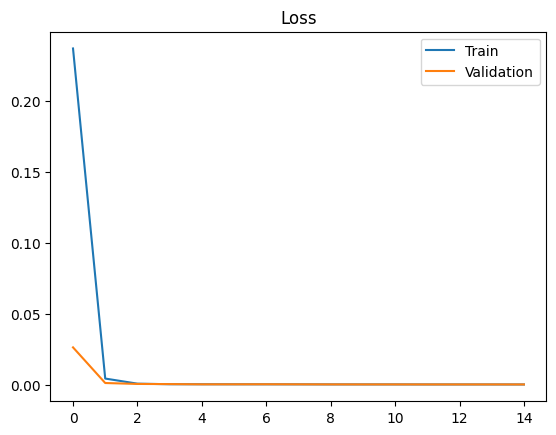

In [33]:
plt.plot(history.history["loss"], label='Train')
plt.plot(history.history["val_loss"], label='Validation')
plt.title("Loss")
plt.legend()
#plt.plot(history.history['val_loss'])
# plt.plot(history.history['val_Customers_mse'])
# plt.plot(history.history['val_Sales_mse'])
#plt.show()
#plt.plot(history.history['loss'])
# plt.plot(history.history['Customers_mse'])
# plt.plot(history.history['Sales_mse'])

# Métrica

$$
\textrm{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{\hat{y}_i - y_i}{y_i}\right)^2}
$$

In [34]:
model.evaluate(X_val, y_val)

944/944 [==============================] - 5s 5ms/step - loss: 1.6974e-04 - Sales_loss: 9.6420e-05 - Customers_loss: 6.5650e-05 - Sales_mse: 9.6420e-05 - Sales_rmspe: 0.0117 - Customers_mse: 6.5650e-05 - Customers_rmspe: 0.0129


[0.00016973969468381256,
 9.641952783567831e-05,
 6.564962677657604e-05,
 9.641952783567831e-05,
 0.011690854094922543,
 6.564962677657604e-05,
 0.01288848277181387]

In [35]:
model.load_weights('bestmodel.hdf5')
model.evaluate(X_val, y_val)

944/944 [==============================] - 5s 5ms/step - loss: 1.6974e-04 - Sales_loss: 9.6420e-05 - Customers_loss: 6.5650e-05 - Sales_mse: 9.6420e-05 - Sales_rmspe: 0.0117 - Customers_mse: 6.5650e-05 - Customers_rmspe: 0.0129


[0.00016973969468381256,
 9.641952783567831e-05,
 6.564962677657604e-05,
 9.641952783567831e-05,
 0.011690854094922543,
 6.564962677657604e-05,
 0.01288848277181387]

In [36]:
if log_output:
    if add_customers:
        y_pred = np.exp(model.predict(X_val, verbose=1)[0][:, 0]*max_log_y)
        y_pred_test = np.exp(model.predict(X_test, verbose=1)[0][:, 0]*max_log_y)
    else:
        y_pred = np.exp(model.predict(X_val, verbose=1)*max_log_y)[:,0]
        y_pred_test = np.exp(model.predict(X_test, verbose=1)*max_log_y)[:,0]
else:
    if add_customers:
        y_pred = (model.predict(X_val, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
        y_pred_test = (model.predict(X_test, verbose=1)[0]*y_std[0] + y_mean[0])[:,0]
    else:
        #y_pred = model.predict(X_val, verbose=1)[:,0]*y_std + y_mean
        #y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_std + y_mean
        y_pred = model.predict(X_val, verbose=1)[:,0]*y_max
        y_pred_test = model.predict(X_test, verbose=1)[:,0]*y_max
y_pred_test[df_test['Open'] == 0] = 0

1284/1284 [==============================] - 6s 5ms/step


In [37]:
np.sqrt((((df_val['Sales'].values - y_pred)/df_val['Sales'].values)**2).sum()/len(y_pred))

0.10988678882515715

In [38]:
y_pred_test[:10]

array([4600.218 , 6989.4   , 8785.938 , 7536.7007, 7220.7363, 5631.576 ,
       7193.306 , 7649.6577, 4617.333 , 5772.3647], dtype=float32)

# Sumbit a la competición

In [39]:
import pandas as pd

In [40]:
sample_csv = pd.read_csv('/kaggle/input/rossmann-store-sales/sample_submission.csv')
sample_csv['Sales'] = y_pred_test
sample_csv.head()

sample_csv.to_csv(f'submision.csv', index=False)

# Analisis de embedings

In [41]:
def plot_embed(layer_name, cat_names):
    Y = model.get_layer(layer_name).get_weights()[0]
    print(Y.shape)
    plt.figure(figsize=(8,8))
    plt.scatter(-Y[:, 0], -Y[:, 1])
    for i, txt in enumerate(cat_names):
        plt.annotate(txt, (-Y[i, 0],-Y[i, 1]), xytext = (-5, 8), textcoords = 'offset points')

(7, 7)


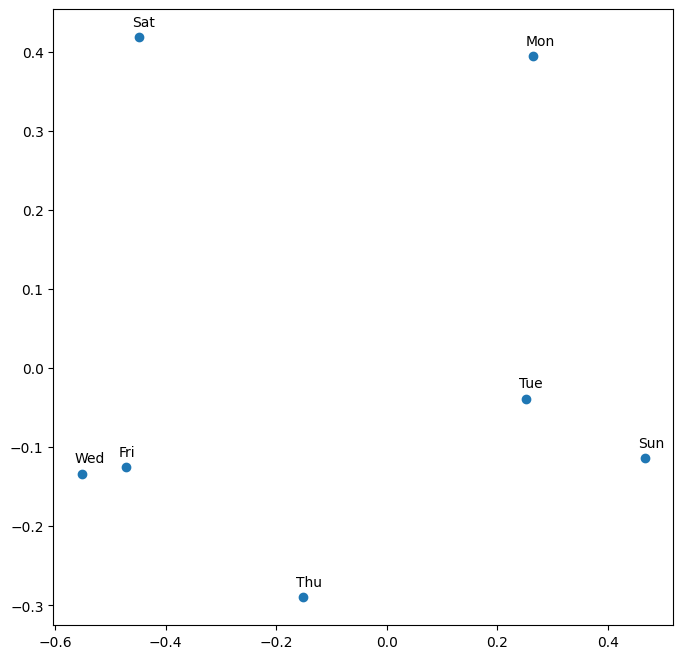

In [42]:
model.load_weights('bestmodel.hdf5')
plot_embed('DayOfWeek_Embed', ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat','Sun'])